In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
count = 0
for file in os.listdir("./basketball_reference/"):
    if file.startswith("all_stats.csv"):
        count += 1
        print count, file

1 all_stats.csv


In [3]:
df = pd.DataFrame()
for file in os.listdir("./basketball_reference/"):
    if file.startswith("all_stats.csv"):
        filepath = "./basketball_reference/" + file
#         print filepath
        data = pd.read_csv(filepath)
        df = df.append(data)

In [4]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MPG,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
573,472,Joe Young\youngjo01,PG,23,IND,41,0,9.4,1.5,4.1,...,15.5,24.4,-0.5,0.5,-0.1,-0.009,-3.9,-1.5,-5.4,-0.3
574,473,Nick Young\youngni01,SG,30,LAL,54,2,19.1,2.3,6.9,...,6.9,18.5,0.1,0.0,0.1,0.003,-1.4,-3.5,-4.8,-0.7
575,474,Thaddeus Young\youngth01,PF,27,BRO,73,73,33.0,6.8,13.2,...,11.6,21.6,1.9,2.2,4.1,0.081,-0.5,0.6,0.1,1.3
576,475,Cody Zeller\zelleco01,C,23,CHA,73,60,24.3,3.2,6.0,...,11.2,15.4,3.6,2.7,6.3,0.169,-1.0,2.0,1.0,1.3
577,476,Tyler Zeller\zellety01,C,26,BOS,60,3,11.8,2.3,4.8,...,12.0,23.0,0.8,0.9,1.7,0.114,-3.2,-1.1,-4.4,-0.4


In [5]:
df = df.reset_index()

In [6]:
df.tail()

,index,Rk,Player,Pos,Age,Tm,G,GS,MPG,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
573,573,472,Joe Young\youngjo01,PG,23,IND,41,0,9.4,1.5,...,15.5,24.4,-0.5,0.5,-0.1,-0.009,-3.9,-1.5,-5.4,-0.3
574,574,473,Nick Young\youngni01,SG,30,LAL,54,2,19.1,2.3,...,6.9,18.5,0.1,0.0,0.1,0.003,-1.4,-3.5,-4.8,-0.7
575,575,474,Thaddeus Young\youngth01,PF,27,BRO,73,73,33.0,6.8,...,11.6,21.6,1.9,2.2,4.1,0.081,-0.5,0.6,0.1,1.3
576,576,475,Cody Zeller\zelleco01,C,23,CHA,73,60,24.3,3.2,...,11.2,15.4,3.6,2.7,6.3,0.169,-1.0,2.0,1.0,1.3
577,577,476,Tyler Zeller\zellety01,C,26,BOS,60,3,11.8,2.3,...,12.0,23.0,0.8,0.9,1.7,0.114,-3.2,-1.1,-4.4,-0.4


In [7]:
del df['index']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 51 columns):
Rk        578 non-null int64
Player    578 non-null object
Pos       578 non-null object
Age       578 non-null int64
Tm        578 non-null object
G         578 non-null int64
GS        578 non-null int64
MPG       578 non-null float64
FG        578 non-null float64
FGA       578 non-null float64
FG%       575 non-null float64
3P        578 non-null float64
3PA       578 non-null float64
3P%       522 non-null float64
2P        578 non-null float64
2PA       578 non-null float64
2P%       570 non-null float64
eFG%      575 non-null float64
FT        578 non-null float64
FTA       578 non-null float64
FT%       554 non-null float64
ORB       578 non-null float64
DRB       578 non-null float64
TRB       578 non-null float64
AST       578 non-null float64
STL       578 non-null float64
BLK       578 non-null float64
TOV       578 non-null float64
PF        578 non-null float64
PS/G   

In [9]:
df.columns.values

array(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MPG', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PS/G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'], dtype=object)

In [11]:
df = df.dropna(axis=0, how='any')

In [13]:
cols = list(df.columns.values[7:])

In [14]:
cols = [col for col in cols if col not in ['FG%','3P%','2P%','FT%']]

In [15]:
X = df[cols]

In [17]:
y = pd.DataFrame(X[['PS/G']], columns=['PPG'])

In [18]:
X.columns.values

array(['MPG', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'eFG%', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PS/G', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'], dtype=object)

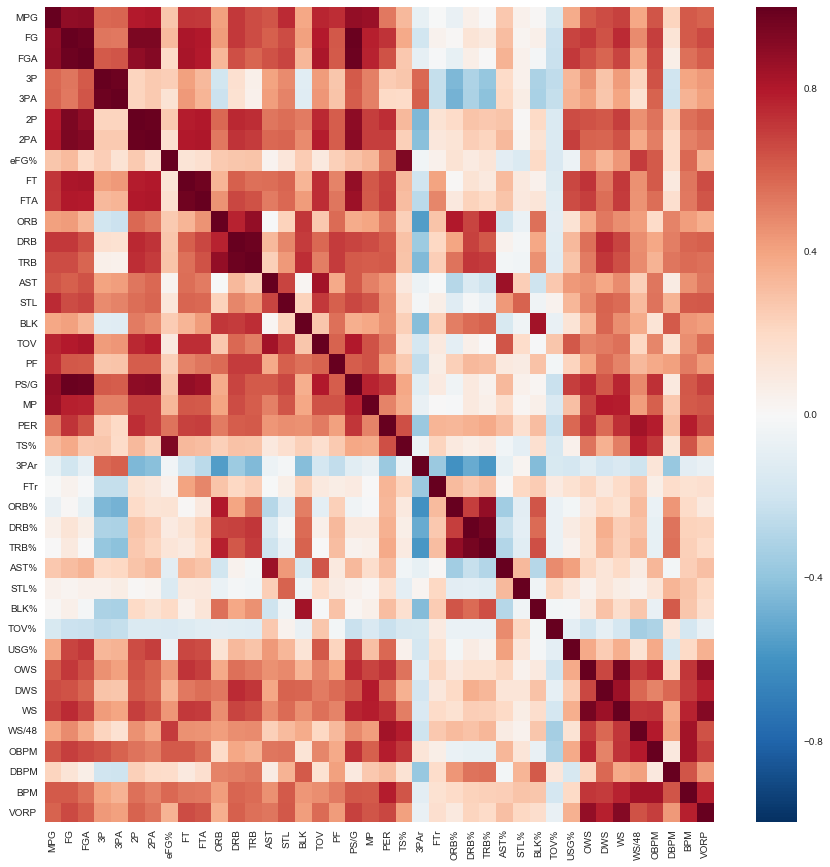

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), ax=ax)

In [21]:
X.corr()['PS/G'].sort_values(ascending=False)

PS/G     1.000000
FG       0.986056
FGA      0.981868
2PA      0.904187
2P       0.896156
MPG      0.882076
FT       0.880778
FTA      0.852424
TOV      0.804580
MP       0.773312
WS       0.760575
OWS      0.742799
OBPM     0.727347
PER      0.718597
USG%     0.691316
VORP     0.685448
DRB      0.672184
STL      0.667391
DWS      0.621973
BPM      0.620345
AST      0.616426
3P       0.611918
TRB      0.611443
3PA      0.608656
PF       0.604776
WS/48    0.479738
TS%      0.388098
ORB      0.367318
BLK      0.362122
AST%     0.322347
eFG%     0.293465
DBPM     0.097899
DRB%     0.096999
FTr      0.092397
STL%     0.048186
TRB%     0.046492
BLK%     0.018822
ORB%    -0.044078
3PAr    -0.113249
TOV%    -0.220216
Name: PS/G, dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=cols)

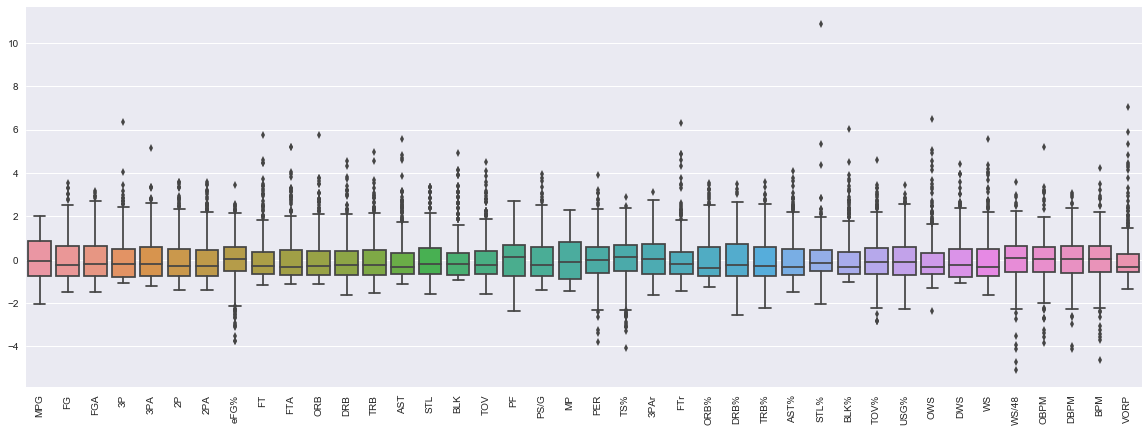

In [24]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
ax = sns.boxplot(data=Xs, ax=ax)#, notch=True)
ax.set_xticklabels(cols, rotation=90)
plt.show()

In [25]:
# checking for nan's
count = 0
for col in Xs.columns:
    for i, row in enumerate(Xs[col]):
        if np.isnan(row):
            count += 1
            print i, col, row
print count

0
